## Framing the Problem

### The main goal of this report is to explore the relationships between dependent variable (**median house value**) and three independent variables.(**median income,population,number of households**).

### With the help of univariate linear regression we can understand how these three variables influences **median house value** and housing market analysis in California.

## Getting the Data and importing required packages.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv("data/housing.csv")
data_df = pd.DataFrame(data)
data_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploratory Data Analysis

#### 1.Explore statistics

In [79]:
data_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<p>The given dataset contains one raw per census block group.A block group is the smallest geographical unit.
<br>Median Income within a block of houses measured in tens of thousands of US dollars and Median house value measured in US Dollars.</p>

#### 2.Describing 4 variables using in this Analysis

In [80]:
data_df[['median_income','population','households','median_house_value']].describe()

,median_income,population,households,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,1425.476744,499.539680,206855.816909
std,1.899822,1132.462122,382.329753,115395.615874
min,0.499900,3.000000,1.000000,14999.000000
25%,2.563400,787.000000,280.000000,119600.000000
50%,3.534800,1166.000000,409.000000,179700.000000
75%,4.743250,1725.000000,605.000000,264725.000000
max,15.000100,35682.000000,6082.000000,500001.000000


<p>The median_income ranges from 0.499900 (USD 499900) to 15.000100 (USD 150001) with a 
standard deviation of 1.899822 (USD 189982).
Population ranges from 3 to 35682 with a standard devation of 1132.
Households ranges from 1 to 6082 with a standard devation of 382. 
Median house value ranges from  USD 14999 to USD 500001 with a standard devaion of 115395.61.

**Reviews:** Median Income is low in some areas while others have high value which represents the mix of economic conditions.
Population and Households have high range of values.
Median house value ranges from low to high value which represents affordability in house prices.
</p>
    

#### 4. Seaborn scatter plots

##### Scatter plot for **median house value vs. median income**

<Axes: xlabel='median_income', ylabel='median_house_value'>

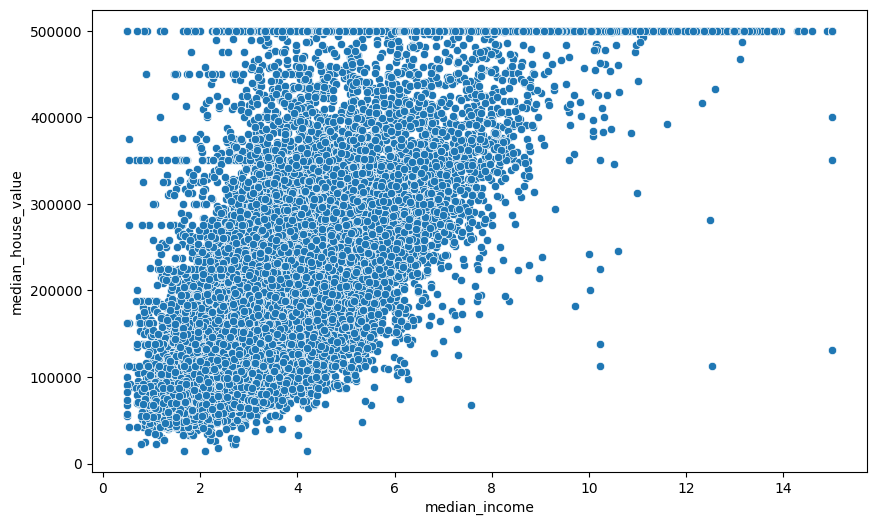

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='median_income', y='median_house_value')

This graph shows a positive relation between median income and media house value. As median income increases median house value increases. That means areas with higher income related with high value houses. So median income is a good factor for the median house value.

##### Scatter plot for  **median house value vs. population**

<Axes: xlabel='population', ylabel='median_house_value'>

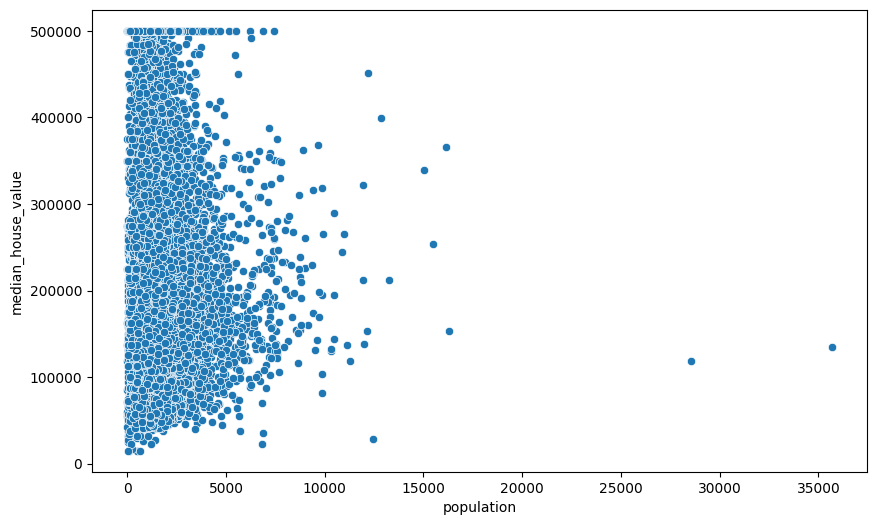

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='population', y='median_house_value')

This graph indicates that areas with high population and less house values. There are also areas with high population with high house values.It shows an unordered relation between population and median house value. 

##### Scatter plot for **median house value vs. number of households**

<Axes: xlabel='households', ylabel='median_house_value'>

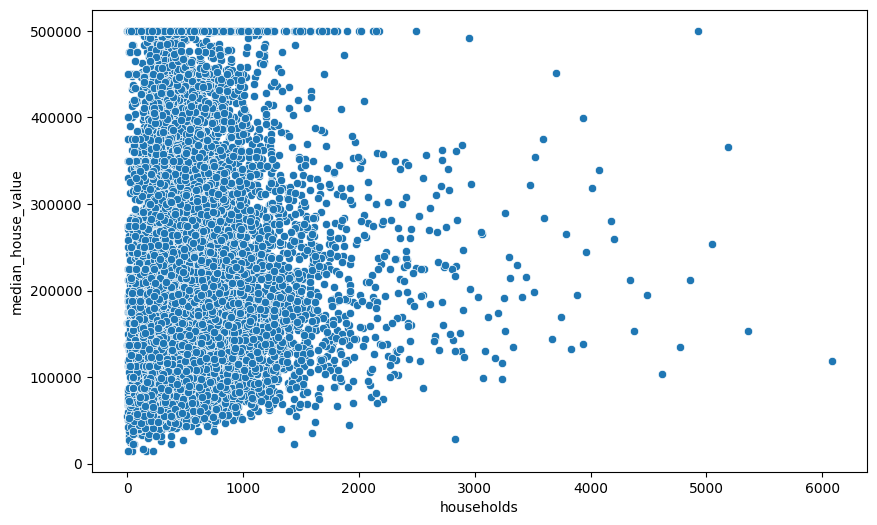

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='households', y='median_house_value')

Households also not showing a clear relationship with median house value. There are areas with high number of households for lower and higher median house values.

## Linear Regressions

### Regression Model 

In [84]:
# Model 
model = LinearRegression()

### 1. Fitting between **median house value vs. median income**

In [85]:
median_income = data_df[['median_income']]
model.fit(X=median_income, y=data_df['median_house_value'])


LinearRegression()

#### Evaluation for Median Income

In [86]:
income_intercept = model.intercept_
income_coef = model.coef_
predicted_income = model.predict(median_income)
mse_income = mean_squared_error(data_df['median_house_value'], predicted_income)
mae_income = mean_absolute_error(data_df['median_house_value'], predicted_income)

table_inc =  pd.DataFrame({
    'Model Name': ['Median Income'],
    'Intercept': [income_intercept],
    'Coef': [income_coef],
    'MSE': [mse_income],
    'MAE': [mae_income]
})
table_inc

,Model Name,Intercept,Coef,MSE,MAE
0,Median Income,45085.576703,[41793.849201896286],7.011312e+09,62625.933791


#### Scatter Plot with resulting line for **median income**

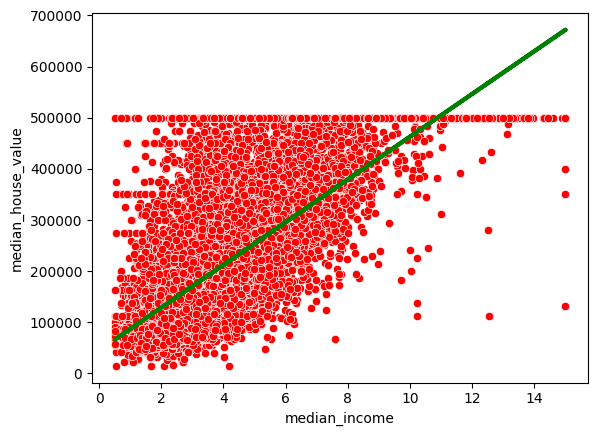

In [87]:
sns.scatterplot(data=data_df, x='median_income', y='median_house_value',color = "red")
plt.plot(median_income , predicted_income, color = "green",linewidth =3)
plt.show()

### 2. Fitting between **median house value vs. population**

In [88]:
population = data_df[['population']]
model.fit(X=population, y=data_df['median_house_value'])

LinearRegression()

#### Evaluation for Population

In [89]:
pop_intercept = model.intercept_
pop_coef = model.coef_
predicted_pop = model.predict(population)
mse_pop = mean_squared_error(data_df['median_house_value'],  predicted_pop)
mae_pop = mean_absolute_error(data_df['median_house_value'], predicted_pop)

table_pop =  pd.DataFrame({
    'Model Name': ['Population'],
    'Intercept': [pop_intercept],
    'Coef': [pop_coef],
    'MSE': [mse_pop],
    'MAE': [mae_pop]
})
table_pop

,Model Name,Intercept,Coef,MSE,MAE
0,Population,210436.262076,[-2.511752774615085],1.330741e+10,91153.820095


#### Scatter Plot with resulting line for **population**

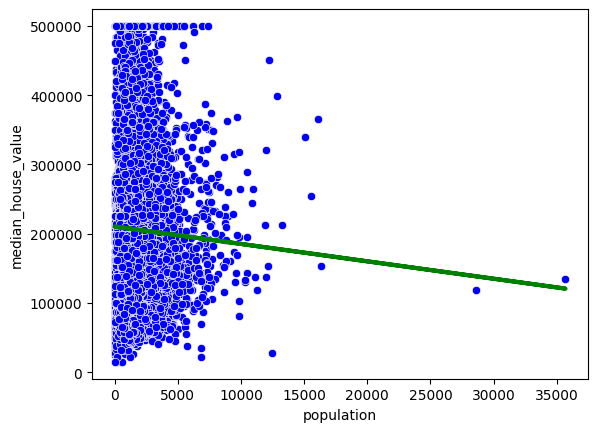

In [90]:
sns.scatterplot(data=data_df, x='population', y='median_house_value',color = "blue")
plt.plot(population , predicted_pop, color = "green",linewidth =3)
plt.show()

### 3. Fitting between **median house value vs. households**

In [91]:
households = data_df[['households']]
model.fit(X=households, y=data_df['median_house_value'])

LinearRegression()

#### Evaluation for Households

In [92]:
house_intercept = model.intercept_
house_coef = model.coef_
predicted_house = model.predict(households)
mse_house = mean_squared_error(data_df['median_house_value'],  predicted_house)
mae_house = mean_absolute_error(data_df['median_house_value'], predicted_house)

table_house =  pd.DataFrame({
    'Model Name': ['Households'],
    'Intercept': [house_intercept],
    'Coef': [house_coef],
    'MSE': [mse_house],
    'MAE': [mae_house]
})
table_house

,Model Name,Intercept,Coef,MSE,MAE
0,Households,196928.577162,[19.872775155643875],1.325778e+10,90802.743243


#### Scatter Plot with resulting line for **households**

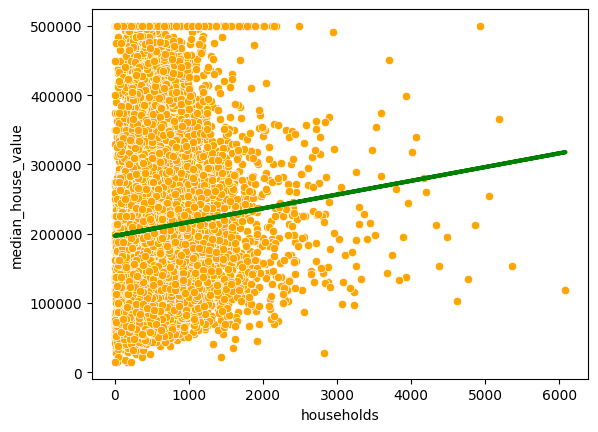

In [93]:
sns.scatterplot(data=data_df, x='households', y='median_house_value',color = "orange")
plt.plot(households , predicted_house, color = "green",linewidth =3)
plt.show()

**Insights:**  The model of median house value v/s median income appears to be best fit. Because, the plot shows a positive linear relationship between these two variables. As the median income increases, median house value increases.

The model which has low MSE & MAE is the best model. That means lower the residuals, better the model. 
From the three models, Median Income model has the low MSE & MAE when comapred to other models.